#### **Project Title:**

## **"Hybrid Deep Learning for Predictive Maintenance: Comparing Transformers and LSTMs for Remaining Useful Life (RUL) Prediction"**

This snippet allows you to upload files directly from your local system to the Colab environment. The `files.upload()` function opens a file chooser dialog, and the uploaded files will be available in the current working directory.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CMAPSSData.zip to CMAPSSData.zip


In [ ]:
!unzip CMAPSSData.zip -d /content/CMAPSSData

Archive:  CMAPSSData.zip
  inflating: /content/CMAPSSData/Damage Propagation Modeling.pdf  
  inflating: /content/CMAPSSData/readme.txt  
  inflating: /content/CMAPSSData/RUL_FD001.txt  
  inflating: /content/CMAPSSData/RUL_FD002.txt  
  inflating: /content/CMAPSSData/RUL_FD003.txt  
  inflating: /content/CMAPSSData/RUL_FD004.txt  
  inflating: /content/CMAPSSData/test_FD001.txt  
  inflating: /content/CMAPSSData/test_FD002.txt  
  inflating: /content/CMAPSSData/test_FD003.txt  
  inflating: /content/CMAPSSData/test_FD004.txt  
  inflating: /content/CMAPSSData/train_FD001.txt  
  inflating: /content/CMAPSSData/train_FD002.txt  
  inflating: /content/CMAPSSData/train_FD003.txt  
  inflating: /content/CMAPSSData/train_FD004.txt  


Install Required Libraries

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn tensorflow

In [ ]:
cd /content/CMAPSSData

/content/CMAPSSData


Load CMAPSS Dataset

Dataset Link:[link text](https://data.nasa.gov/Aerospace/CMAPSS-Jet-Engine-Simulated-Data/ff5v-kuh6/about_data)

In [ ]:
# Step 1: Load the dataset
import pandas as pd
train_data = pd.read_csv("/content/CMAPSSData/train_FD001.txt", sep=" ", header=None)
train_data = train_data.dropna(axis=1)  # Drop unnecessary columns (empty ones)

This code assigns meaningful and descriptive **column names** to a DataFrame. It creates a list of column names, including **Unit_Number, Time_in_Cycles, three operational settings (Op_Setting_1 to Op_Setting_3), and 21 sensor measurements (Sensor_1 to Sensor_21)**. These names make the data easier to understand and analyze.

In [ ]:
# Step 2: Assign meaningful column names
columns = ["Unit_Number", "Time_in_Cycles"] + [f"Op_Setting_{i}" for i in range(1, 4)] + [f"Sensor_{i}" for i in range(1, 22)]
train_data.columns = columns

In [ ]:
# Step 3: Preview the dataset
print(f"Shape of the dataset: {train_data.shape}")
train_data.head()

Shape of the dataset: (20631, 26)


,Unit_Number,Time_in_Cycles,Op_Setting_1,Op_Setting_2,Op_Setting_3,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,...,Sensor_12,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


Perform Basic Exploratory Data Analysis (EDA)

In [ ]:
# Step 4: Basic Exploratory Data Analysis (EDA)
# Check for missing values
missing_values = train_data.isnull().sum()
print("\nMissing values in each column:\n", missing_values)

# Summary statistics
print("\nSummary statistics:\n")
train_data.describe()


Missing values in each column:
 Unit_Number       0
Time_in_Cycles    0
Op_Setting_1      0
Op_Setting_2      0
Op_Setting_3      0
Sensor_1          0
Sensor_2          0
Sensor_3          0
Sensor_4          0
Sensor_5          0
Sensor_6          0
Sensor_7          0
Sensor_8          0
Sensor_9          0
Sensor_10         0
Sensor_11         0
Sensor_12         0
Sensor_13         0
Sensor_14         0
Sensor_15         0
Sensor_16         0
Sensor_17         0
Sensor_18         0
Sensor_19         0
Sensor_20         0
Sensor_21         0
dtype: int64

Summary statistics:



,Unit_Number,Time_in_Cycles,Op_Setting_1,Op_Setting_2,Op_Setting_3,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,...,Sensor_12,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


# Adding Remaining Useful Life (RUL) Labels
The Remaining Useful Life (RUL) is a critical feature in predictive maintenance. It represents the number of cycles left before a machine fails. We will calculate the RUL for each unit in the training dataset.

Steps to Add RUL:
1. Identify the maximum Time_in_Cycles for each unit (failure point).
2. Subtract the current Time_in_Cycles from the maximum to compute RUL.
4. Add the computed RUL as a new column.

In [ ]:
# Step 1: Compute RUL for each unit
# Find the maximum cycle for each unit (when the unit fails)
max_cycles = train_data.groupby("Unit_Number")["Time_in_Cycles"].max().reset_index()
max_cycles.rename(columns={"Time_in_Cycles": "Max_Cycles"}, inplace=True)

# Step 2: Merge the max cycles back to the original data
train_data = train_data.merge(max_cycles, on="Unit_Number")

# Step 3: Calculate RUL
train_data["RUL"] = train_data["Max_Cycles"] - train_data["Time_in_Cycles"]

# Drop the helper column if not needed
train_data.drop(columns=["Max_Cycles"], inplace=True)

# Step 4: Preview the dataset with RUL
train_data.head()



,Unit_Number,Time_in_Cycles,Op_Setting_1,Op_Setting_2,Op_Setting_3,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,...,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


# Data Preprocessing for Machine Learning
Now that we have the Remaining Useful Life (RUL) column, the next step is to prepare the dataset for **machine learning**. We’ll focus on:

**Feature Selection:**
Select sensor and operational setting columns as features.
**Normalization:**
Scale the features to ensure all values are in a similar range.
**Sequence Preparation:**
Convert the data into sequences for time-series analysis.

# Feature Selection
We’ll exclude non-numeric columns like **Unit_Number** and **Time_in_Cycles** since these are not directly useful for training.

python
Copy code


In [ ]:
# Select feature columns (operational settings and sensors)
feature_columns = [f"Op_Setting_{i}" for i in range(1, 4)] + [f"Sensor_{i}" for i in range(1, 22)]

# Extract features and target (RUL)
X = train_data[feature_columns]
y = train_data["RUL"]

print(f"Feature shape: {X.shape}")
print(f"Target shape: {y.shape}")

Feature shape: (20631, 24)
Target shape: (20631,)


# Normalize the Features
We’ll use Min-Max scaling to normalize the features into a range of 0 to 1.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

# Scale the feature data
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for consistency
X_scaled = pd.DataFrame(X_scaled, columns=feature_columns)

X_scaled.head()

,Op_Setting_1,Op_Setting_2,Op_Setting_3,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,...,Sensor_12,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21
0,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,1.0,0.726248,...,0.633262,0.205882,0.199608,0.363986,0.0,0.333333,0.0,0.0,0.713178,0.724662
1,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,1.0,0.628019,...,0.765458,0.279412,0.162813,0.411312,0.0,0.333333,0.0,0.0,0.666667,0.731014
2,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,1.0,0.710145,...,0.795309,0.220588,0.171793,0.357445,0.0,0.166667,0.0,0.0,0.627907,0.621375
3,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,1.0,0.740741,...,0.889126,0.294118,0.174889,0.166603,0.0,0.333333,0.0,0.0,0.573643,0.662386
4,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,1.0,0.668277,...,0.746269,0.235294,0.174734,0.402078,0.0,0.416667,0.0,0.0,0.589147,0.704502


# Sequence Preparation
LSTM models require sequential data. We will split the data into overlapping sequences with a fixed window size.

In [ ]:
import numpy as np

# Define sequence length
sequence_length = 50

# Function to create sequences
def create_sequences(features, target, sequence_length):
    X_seq, y_seq = [], []
    for i in range(len(features) - sequence_length):
        X_seq.append(features[i:i+sequence_length].values)
        y_seq.append(target[i+sequence_length])
    return np.array(X_seq), np.array(y_seq)

# Prepare sequences
X_sequences, y_sequences = create_sequences(X_scaled, y, sequence_length)

print(f"Sequence shape (features): {X_sequences.shape}")
print(f"Sequence shape (target): {y_sequences.shape}")


Sequence shape (features): (20581, 50, 24)
Sequence shape (target): (20581,)


# Split Data for Training and Testing
We’ll split the data into **training** and **testing** sets.

In [ ]:
from sklearn.model_selection import train_test_split

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=42)

print(f"Training shape: {X_train.shape}, {y_train.shape}")
print(f"Testing shape: {X_test.shape}, {y_test.shape}")


Training shape: (16464, 50, 24), (16464,)
Testing shape: (4117, 50, 24), (4117,)


# Building and Training the LSTM Model
Now that we have preprocessed the data, we’ll build a Long Short-Term Memory (LSTM) model for predicting the Remaining Useful Life (RUL). LSTMs are well-suited for time-series data because they capture temporal dependencies.

# Build the LSTM Model
We’ll create a simple LSTM model with the following structure:

**Input Layer**: Accepts sequential data.

**LSTM Layer**: Captures time-series patterns.

**Dense Layers**: Reduces dimensionality and outputs predictions.



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),  # Regularization to prevent overfitting
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for RUL prediction
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Print the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          15,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           1,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,665 (65.10 KB)

 Trainable params: 16,665 (65.10 KB)

 Non-trainable params: 0 (0.00 B)

# Train the Model
We’ll train the model using the preprocessed training data and validate it using the test data.



In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=64,
    verbose=1
)

Epoch 1/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 10798.6338 - mae: 80.8277 - val_loss: 3284.4365 - val_mae: 44.7827
Epoch 2/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3789.8457 - mae: 47.9472 - val_loss: 2972.6001 - val_mae: 43.1592
Epoch 3/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 3180.1375 - mae: 43.3876 - val_loss: 2546.7280 - val_mae: 37.1388
Epoch 4/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 2804.5103 - mae: 39.9245 - val_loss: 2573.1118 - val_mae: 36.5132
Epoch 5/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 2554.7212 - mae: 37.6669 - val_loss: 2542.9148 - val_mae: 36.0413
Epoch 6/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2434.7773 - mae: 36.2752 - val_loss: 2263.2825 - val_mae: 33.3026
Epoch 7/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2199.7874 - mae: 33.9050 - val_loss: 2369.7834 - val_mae: 36.3586
Epoch 8/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 2331.0645 - mae: 35.1542 - val_loss: 1922.2596 - val_m

# Evaluate the Model
After training, we’ll evaluate the model’s performance on the test set.

In [ ]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (MSE): {loss}")
print(f"Test Mean Absolute Error (MAE): {mae}")

Test Loss (MSE): 1471.784423828125
Test Mean Absolute Error (MAE): 24.943649291992188


# Visualize Training Performance
We’ll plot the loss and mean absolute error (MAE) over the training epochs to ensure the model converges.

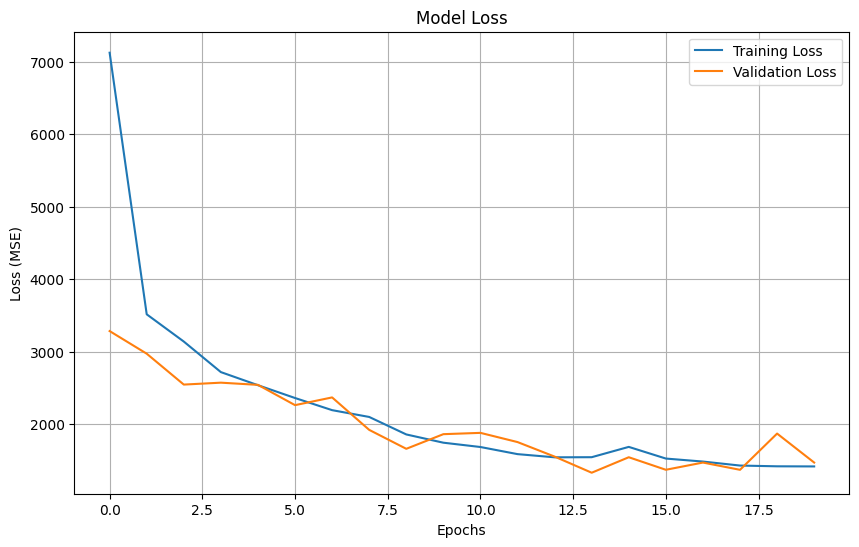

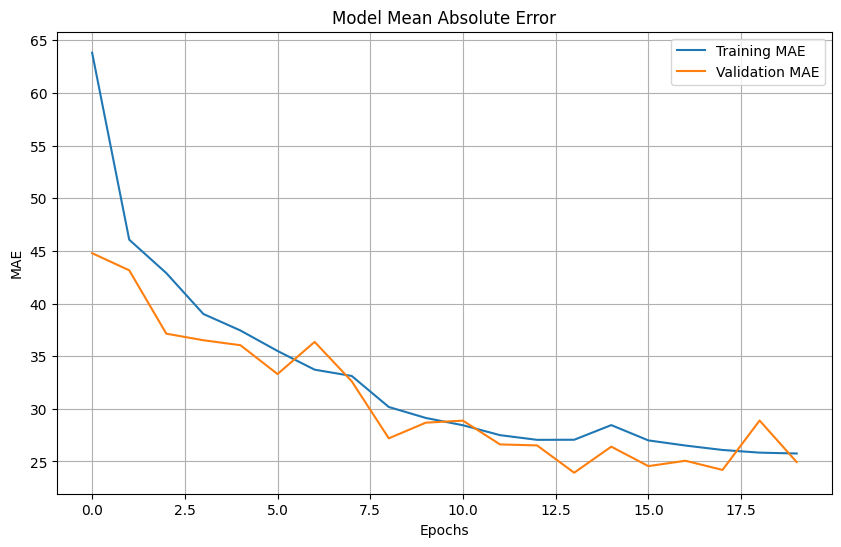

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid()
plt.show()

# Plot training and validation MAE
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid()
plt.show()


# Make Predictions
Finally, we’ll use the trained model to make predictions on the test set and compare them to the actual RUL values.

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


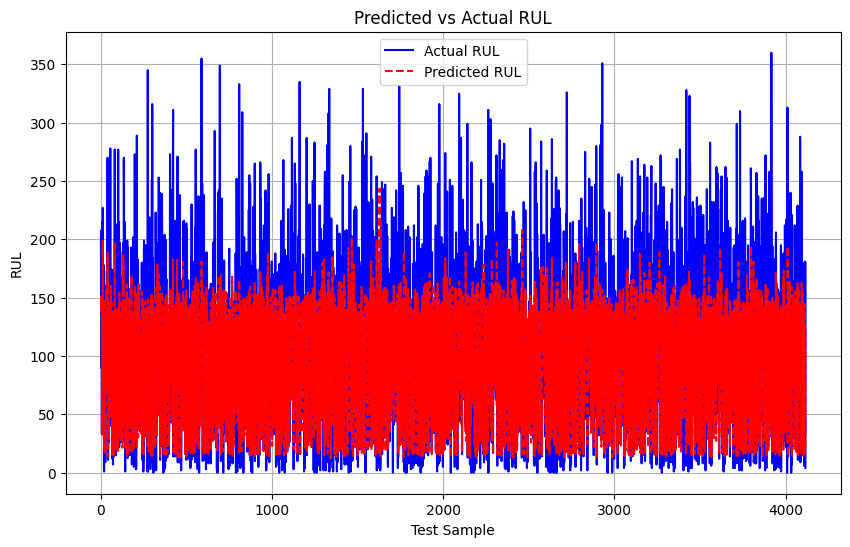

Plot saved as 'predicted_vs_actual_rul_plot.png'


<Figure size 640x480 with 0 Axes>

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Plot predictions vs actual RUL
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual RUL', color='blue')
plt.plot(y_pred, label='Predicted RUL', color='red', linestyle='--')
plt.title('Predicted vs Actual RUL')
plt.xlabel('Test Sample')
plt.ylabel('RUL')
plt.legend()
plt.grid()
plt.show()
# Save the figure
plt.savefig("predicted_vs_actual_rul_plot_LSTM1.png", dpi=300)
print("Plot saved as 'predicted_vs_actual_rul_plot.png'")

# Save

In [ ]:
import pandas as pd

# Save the results to a CSV file
results_df = pd.DataFrame({
    "Actual_RUL": y_test.flatten(),  # Actual RUL values
    "Predicted_RUL": y_pred.flatten()  # Predicted RUL values
})

# Save to a CSV file
results_df.to_csv("predicted_vs_actual_rul_LSTM1.csv", index=False)
print("Results saved to 'predicted_vs_actual_rul.csv'")


Results saved to 'predicted_vs_actual_rul.csv'


In [ ]:
# Save the trained model
model.save("lstm_rul_model_LSTM1.h5")
print("Model saved as 'lstm_rul_model.h5'")


Model saved as 'lstm_rul_model.h5'


# Deeper LSTM model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define a deeper LSTM model
model = Sequential([
    LSTM(128, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    LSTM(64, activation='relu', return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for RUL prediction
])

# Compile the model with a lower learning rate
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 50, 128)             │          78,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 129,857 (507.25 KB)

 Trainable params: 129,857 (507.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Add early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    verbose=1,
    callbacks=[early_stopping]
)


Epoch 1/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - loss: 14033.2715 - mae: 92.6233 - val_loss: 3396.7056 - val_mae: 45.1332
Epoch 2/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 18441.8320 - mae: 88.4128 - val_loss: 15428.2656 - val_mae: 104.3618
Epoch 3/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 4521716.5000 - mae: 120.1253 - val_loss: 5593.8984 - val_mae: 59.6989
Epoch 4/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 5461.0254 - mae: 59.8247 - val_loss: 5964.6841 - val_mae: 61.0863
Epoch 5/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 4948.2295 - mae: 57.0893 - val_loss: 5938.8140 - val_mae: 59.8702
Epoch 6/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 4261.0107 - mae: 52.2875 - val_loss: 5273.6626 - val_mae: 55.1581
Epoch 7/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 3907.5403 - mae: 49.5529 - val_loss: 6320.0615 - val_mae: 61.1312
Epoch 8/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 3708.0083 - mae: 48.2420 - val_loss: 4704

In [ ]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (MSE): {loss}")
print(f"Test Mean Absolute Error (MAE): {mae}")


Test Loss (MSE): 3396.7041015625
Test Mean Absolute Error (MAE): 45.133243560791016


129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


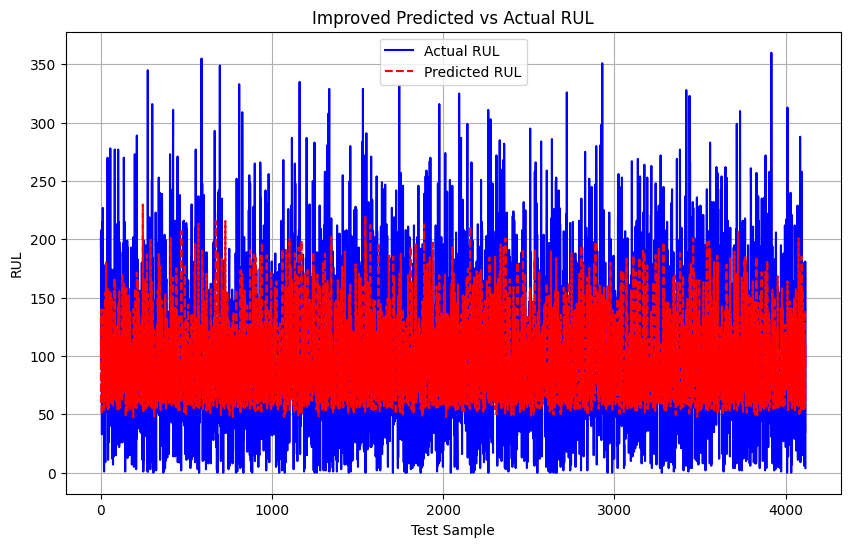

Plot saved as 'predicted_vs_actual_rul_plot2.png'


<Figure size 640x480 with 0 Axes>

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Plot predictions vs actual RUL
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual RUL', color='blue')
plt.plot(y_pred, label='Predicted RUL', color='red', linestyle='--')
plt.title('Improved Predicted vs Actual RUL')
plt.xlabel('Test Sample')
plt.ylabel('RUL')
plt.legend()
plt.grid()
plt.show()
# Save the figure
plt.savefig("predicted_vs_actual_rul_plot.png", dpi=300)
print("Plot saved as 'predicted_vs_actual_rul_plot2.png'")


In [ ]:
import pandas as pd

# Save the results to a CSV file
results_df = pd.DataFrame({
    "Actual_RUL": y_test.flatten(),  # Actual RUL values
    "Predicted_RUL": y_pred.flatten()  # Predicted RUL values
})

# Save to a CSV file
results_df.to_csv("predicted_vs_actual_rul_LSTM2.csv", index=False)
print("Results saved to 'predicted_vs_actual_rul.csv'")


Results saved to 'predicted_vs_actual_rul.csv'




---



---



# Building a Transformer for Time-Series Data
We’ll use TensorFlow/Keras to build the Transformer model.

Transformer Architecture
Input Embedding:
Maps input sequences to a higher-dimensional space.

**Positional Encoding:**
Adds positional information to the embeddings since Transformers process sequences in parallel.

**Multi-Head Attention:**
Focuses on different parts of the sequence simultaneously.

**Dense Layers:**
Reduces the output to a single RUL value.

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 50, 24)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ positional_encoding_2     │ (None, 50, 24)         │              0 │ input_layer_4[0][0]    │
│ (PositionalEncoding)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention      │ (None, 50, 24)         │         25,368 │ positional_encoding_2… │
│ (MultiHeadAttention)      │                        │                │ positional_encoding_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 50, 24)         │              0 │ multi_head_attention[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 50, 24)         │              0 │ dropout_4[0][0],       │
│                           │                        │                │ positional_encoding_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization       │ (None, 50, 24)         │             48 │ add[0][0]              │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 50, 128)        │          3,200 │ layer_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_5 (Dropout)       │ (None, 50, 128)        │              0 │ dense_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 50, 24)         │          3,096 │ dropout_5[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 50, 24)         │              0 │ dense_5[0][0],         │
│                           │                        │                │ layer_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_1     │ (None, 50, 24)         │             48 │ add_1[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_1    │ (None, 50, 24)         │         25,368 │ layer_normalization_1… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_7 (Dropout)       │ (None, 50, 24)         │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_2 (Add)               │ (None, 50, 24)         │              0 │ dropout_7[0][0],       │
│                           │                        │                │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_2     │ (None, 50, 24)         │             48 │ add_2[0][0]            │
│ (LayerNormalization) 

 Total params: 280,897 (1.07 MB)

 Trainable params: 280,897 (1.07 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 35s 60ms/step - loss: 4877.7441 - mae: 52.5095 - val_loss: 1296.0845 - val_mae: 24.3144
Epoch 2/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 1390.1212 - mae: 25.2377 - val_loss: 1246.7482 - val_mae: 23.4673
Epoch 3/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 1336.1360 - mae: 24.6434 - val_loss: 1231.1370 - val_mae: 23.6069
Epoch 4/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 1309.4769 - mae: 24.5087 - val_loss: 1695.9554 - val_mae: 28.3160
Epoch 5/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 1392.8663 - mae: 25.3396 - val_loss: 1216.7415 - val_mae: 22.7999
Epoch 6/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 1268.4572 - mae: 23.8405 - val_loss: 1185.4125 - val_mae: 21.8838
Epoch 7/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1267.1266 - mae: 23.8627 - val_loss: 1184.1777 - val_mae: 22.9261
Epoch 8/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 1265.0410 - mae: 23.7330 - val_loss: 1217.2675 - 

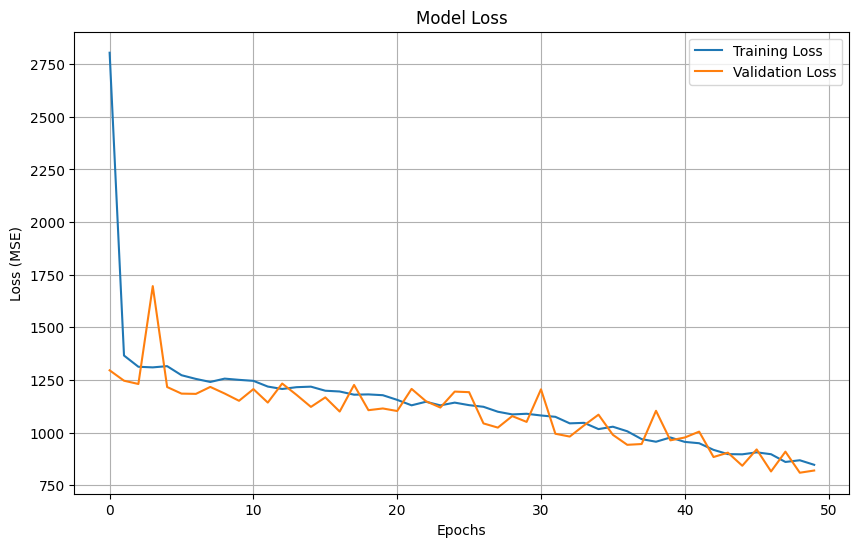

129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


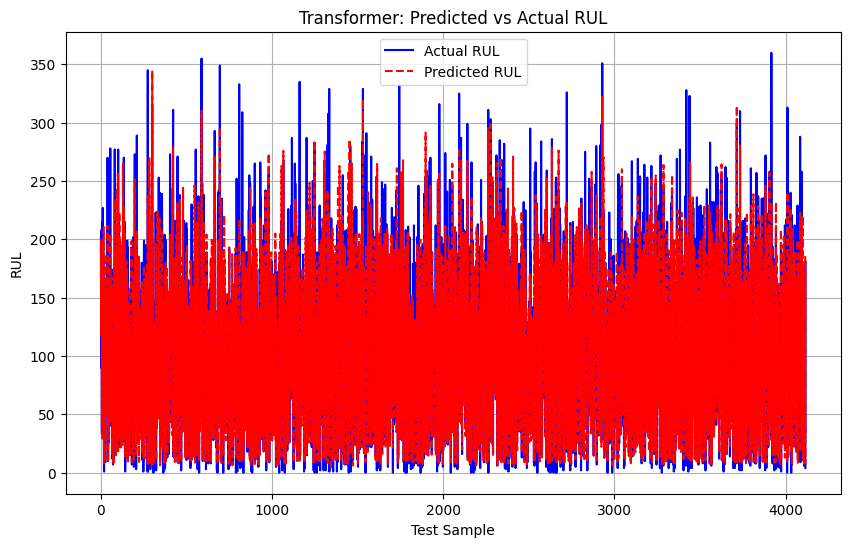

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, Flatten
from tensorflow.keras.layers import MultiHeadAttention, Add
import matplotlib.pyplot as plt

# Step 1: Define Positional Encoding Layer
class PositionalEncoding(tf.keras.layers.Layer):
    def __init__(self, sequence_length, d_model):
        super(PositionalEncoding, self).__init__()
        self.sequence_length = sequence_length
        self.d_model = d_model

    def get_angles(self, pos, i, d_model):
        angles = pos / tf.math.pow(10000.0, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
        return angles

    def call(self, inputs):
        inputs = tf.cast(inputs, tf.float32)  # Ensure inputs are float32
        pos = tf.cast(tf.range(self.sequence_length)[:, tf.newaxis], tf.float32)
        i = tf.cast(tf.range(self.d_model)[tf.newaxis, :], tf.float32)

        angle_rads = self.get_angles(pos, i, self.d_model)

        # Apply sin to even indices and cos to odd indices
        sines = tf.math.sin(angle_rads[:, 0::2])
        cosines = tf.math.cos(angle_rads[:, 1::2])

        # Reconstruct the positional encoding tensor
        angle_rads = tf.concat([sines, cosines], axis=-1)

        # Add positional encoding to the input
        return inputs + angle_rads


# Step 2: Define Transformer Block
def transformer_block(inputs, head_size, num_heads, ff_dim, dropout=0.1):
    # Multi-Head Attention
    attention = MultiHeadAttention(num_heads=num_heads, key_dim=head_size)(inputs, inputs)
    attention = Dropout(dropout)(attention)
    attention = Add()([attention, inputs])
    attention = LayerNormalization(epsilon=1e-6)(attention)

    # Feed Forward Network
    outputs = Dense(ff_dim, activation="relu")(attention)
    outputs = Dropout(dropout)(outputs)
    outputs = Dense(inputs.shape[-1])(outputs)
    outputs = Add()([outputs, attention])
    outputs = LayerNormalization(epsilon=1e-6)(outputs)

    return outputs


# Step 3: Build the Transformer Model
def build_transformer_model(sequence_length, num_features, head_size=64, num_heads=4, ff_dim=128, num_blocks=4, dropout=0.1):
    inputs = Input(shape=(sequence_length, num_features))
    x = PositionalEncoding(sequence_length, num_features)(inputs)

    for _ in range(num_blocks):
        x = transformer_block(x, head_size, num_heads, ff_dim, dropout)

    x = Flatten()(x)
    x = Dense(128, activation="relu")(x)
    x = Dropout(dropout)(x)
    outputs = Dense(1, activation="linear")(x)

    model = Model(inputs, outputs)
    model.compile(optimizer="adam", loss="mse", metrics=["mae"])
    return model


# Step 4: Set Parameters and Build Model
sequence_length = X_train.shape[1]  # Number of time steps in each sequence
num_features = X_train.shape[2]  # Number of features in each time step

transformer_model = build_transformer_model(sequence_length, num_features)
transformer_model.summary()


# Step 5: Train the Model
history = transformer_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    verbose=1
)


# Step 6: Evaluate the Model
loss, mae = transformer_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (MSE): {loss}")
print(f"Test Mean Absolute Error (MAE): {mae}")


# Step 7: Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid()
plt.show()


# Step 8: Visualize Predictions
y_pred = transformer_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual RUL', color='blue')
plt.plot(y_pred, label='Predicted RUL', color='red', linestyle='--')
plt.title('Transformer: Predicted vs Actual RUL')
plt.xlabel('Test Sample')
plt.ylabel('RUL')
plt.legend()
plt.grid()
plt.show()

# Save the figure
plt.savefig("predicted_vs_actual_rul_plot3.png", dpi=300)
print("Plot saved as 'predicted_vs_actual_rul_plot2.png'")


In [ ]:
import pandas as pd

# Save the results to a CSV file
results_df = pd.DataFrame({
    "Actual_RUL": y_test.flatten(),  # Actual RUL values
    "Predicted_RUL": y_pred.flatten()  # Predicted RUL values
})

# Save to a CSV file
results_df.to_csv("predicted_vs_actual_rul3.csv", index=False)
print("Results saved to 'predicted_vs_actual_rul.csv'")


Results saved to 'predicted_vs_actual_rul.csv'
